## Chapter 10

In [322]:
library(ISLR)

## Problem 2

(a) On the basis of this dissimilarity matrix, sketch the dendrogram
that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the
height at which each fusion occurs, as well as the observations
corresponding to each leaf in the dendrogram.

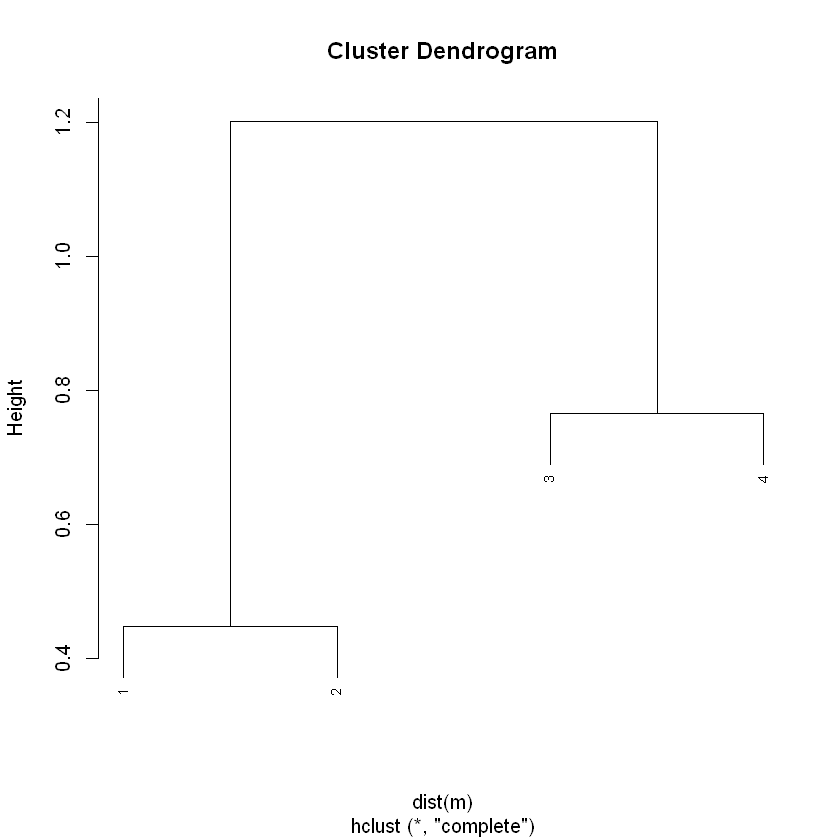

In [323]:
m = matrix(c(0, 0.3, 0.4, 0.7, 
             0.3, 0, 0.5, 0.8,
             0.4, 0.5, 0.0, 0.45,
             0.7, 0.8, 0.45, 0), nrow = 4)
hc.complete =hclust(dist(m), method="complete")
plot(hc.complete, cex = 0.7)

(b) Repeat (a), this time using single linkage clustering

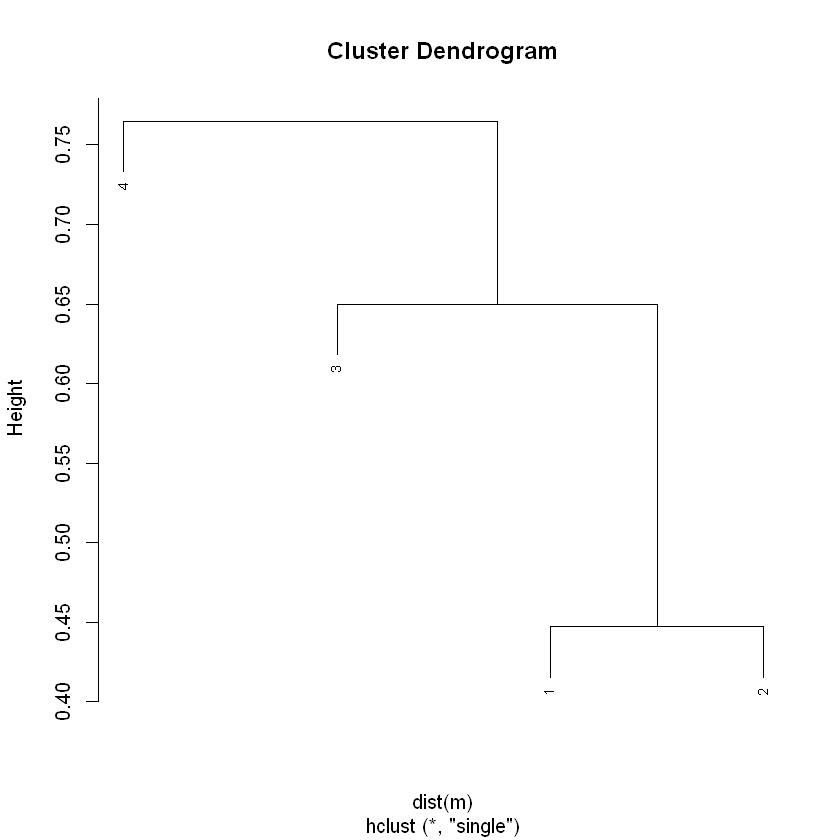

In [324]:
hc.single =hclust(dist(m), method="single")
plot(hc.single, cex = 0.7)

(c) Suppose that we cut the dendogram obtained in (a) such that
two clusters result. Which observations are in each cluster?

1 and 2 in claser 1, 3 and 4 in cluster 2

(d) Suppose that we cut the dendogram obtained in (b) such that
two clusters result. Which observations are in each cluster?

4 in 2, 1,2,3 in 1

(e) It is mentioned in the chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be
swapped without changing the meaning of the dendrogram. Draw
a dendrogram that is equivalent to the dendrogram in (a), for
which two or more of the leaves are repositioned, but for which
the meaning of the dendrogram is the same.

swap labels 1 with 2 and 3 with 4

## Problem 3

In [ ]:
3. In this problem, you will perform K-means clustering manually, with
K = 2, on a small example with n = 6 observations and p = 2
features. The observations are as follows.

Obs. X1 X2

   1  1  4

   2  1  3

   3  0  4

   4  5  1

   5  6  2 

   6  4  0
   
(a) Plot the observations.

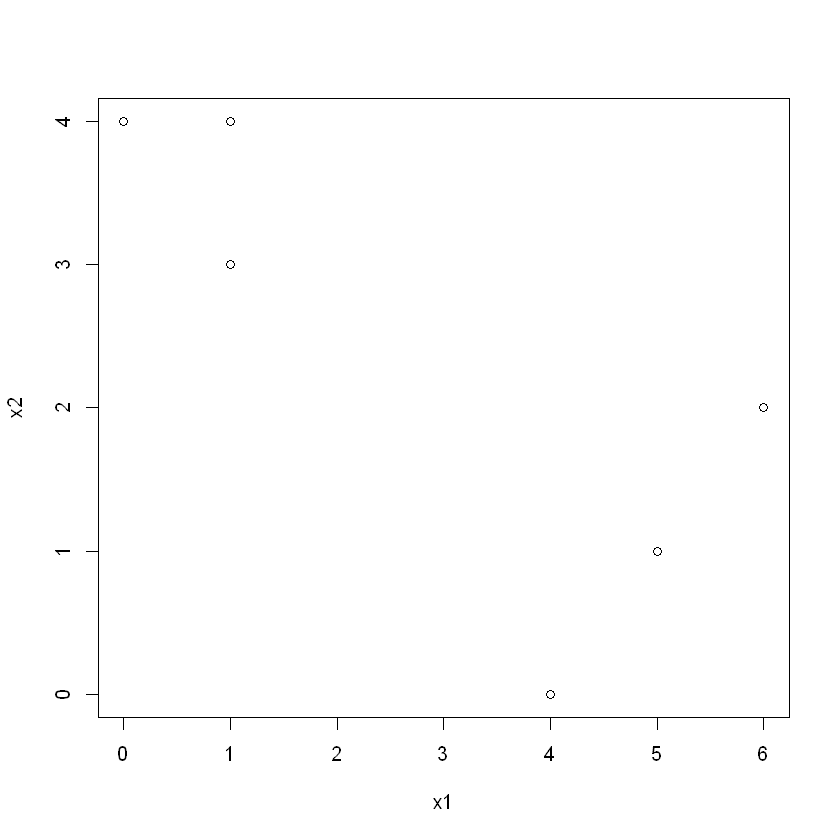

In [496]:
x1<-c(1, 1, 0, 5, 6, 4)
x2<-c(4, 3, 4, 1, 2, 0)
plot(x1, x2)

(b) Randomly assign a cluster label to each observation. You can
use the sample() command in R to do this. Report the cluster
labels for each observation.

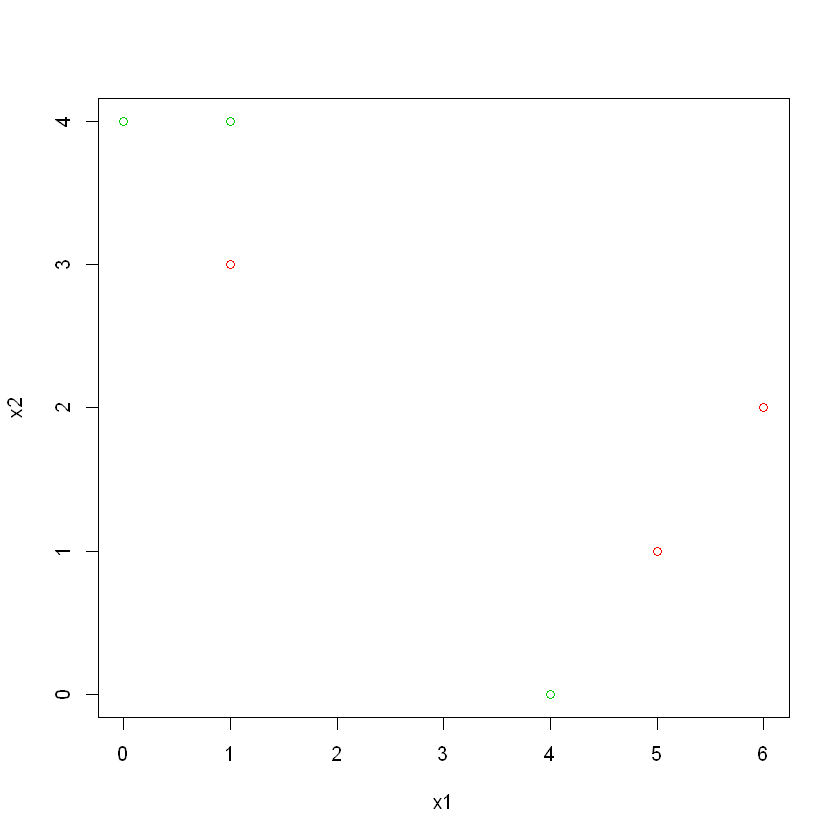

In [497]:
set.seed(3)
l1 = sample(seq(6), 3) 
label=rep(NA, 6)
label[l1]=1
label[-l1]=2
plot(x1, x2, col=label+1)

(c) Compute the centroid for each cluster.

In [498]:
x=cbind(x1, x2)
c=make_centroid(x, label)
c1=c[1:2]
c2=c[3:4]

(d) Assign each observation to the centroid to which it is closest, in
terms of Euclidean distance. Report the cluster labels for each
observation.


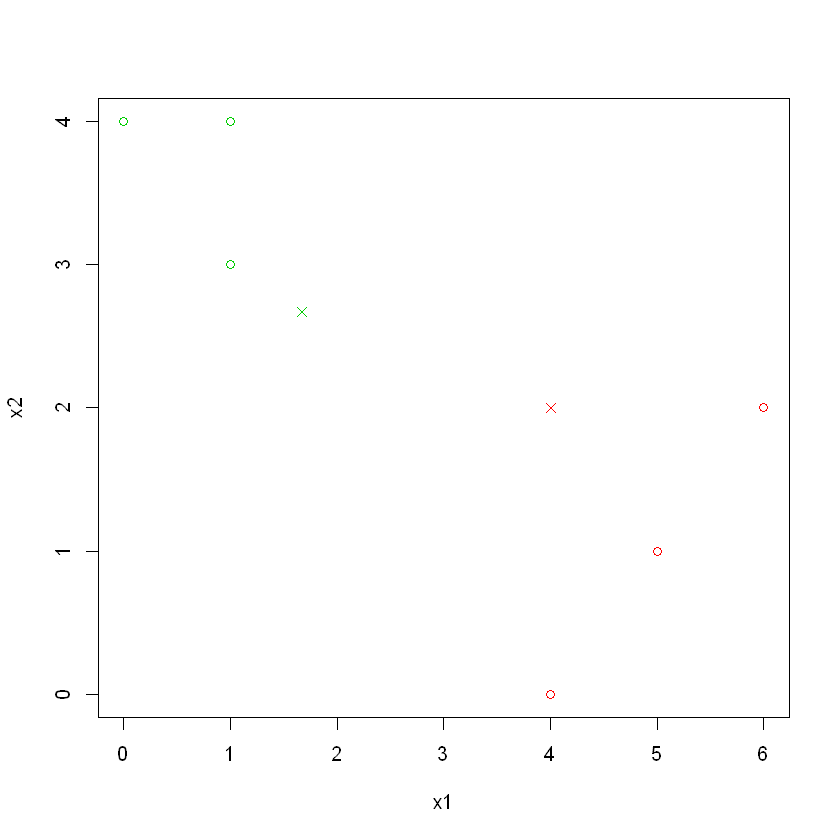

In [499]:
x=cbind(x1, x2)
for(i in 1:6){
    if (sqrt((c1[1]-x[i,1])^2+(c1[2]-x[i,2])^2) < sqrt((c2[1]-x[i,1])^2+(c2[2]-x[i,2])^2)){
        label[i]=1
    }
    else{label[i]=2}
}
plot(x1, x2, col=label+1)
points(c1[1], c1[2], col = 2, pch = 4)
points(c2[1], c2[2], col = 3, pch = 4)

(e) Repeat (c) and (d) until the answers obtained stop changing.


In [501]:
make_centroid=function(x, label){
    c1=rep(NA, 2)
    c2=rep(NA, 2)
    c1[1]=mean(x1[label==1])
    c1[2]=mean(x2[label==1])
    #centroid for cluster 2
    c2[1]=mean(x1[label==2])
    c2[2]=mean(x2[label==2])
    return(c(c1[1], c1[2], c2[1], c2[2]))
}
c=make_centroid(x, label)
c1=c[1:2]
c2=c[3:4]

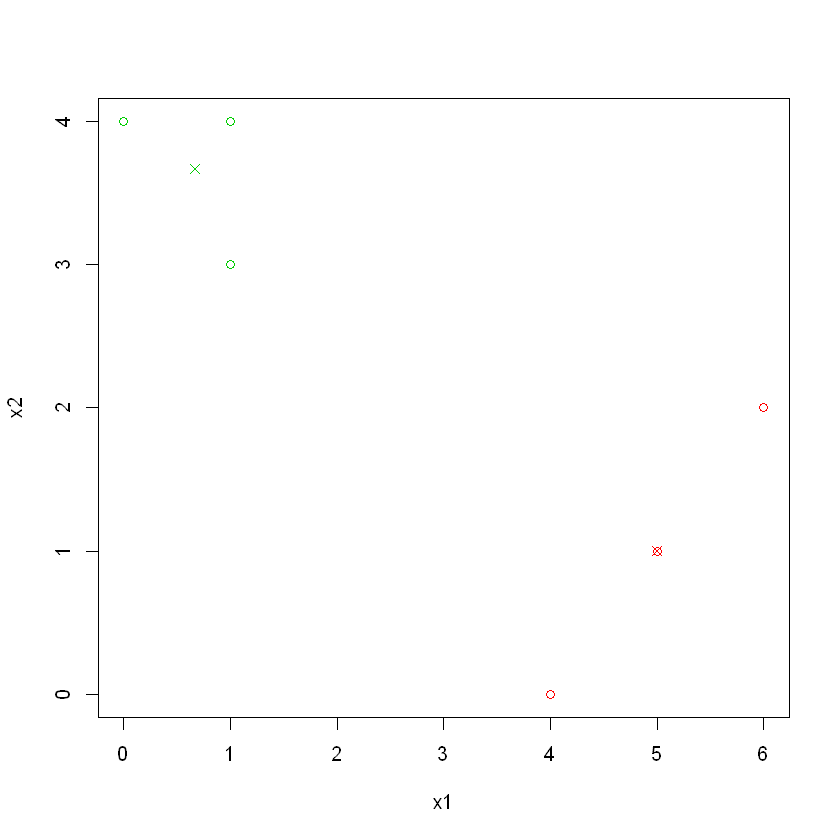

In [502]:
for(i in 1:6){
    if (sqrt((c1[1]-x[i,1])^2+(c1[2]-x[i,2])^2) < sqrt((c2[1]-x[i,1])^2+(c2[2]-x[i,2])^2)){
        label[i]=1
    }
    else{label[i]=2}
}
plot(x1, x2, col=label+1)
points(c1[1], c1[2], col = 2, pch = 4)
points(c2[1], c2[2], col = 3, pch = 4)

(f) In your plot from (a), color the observations according to the
cluster labels obtained.

Nothing has been changed, it is final result.

## Problem 4

Suppose that for a particular data set, we perform hierarchical clustering using single linkage and using complete linkage. We obtain two
dendrograms.

(a) At a certain point on the single linkage dendrogram, the clusters {1, 2, 3} and {4, 5} fuse. On the complete linkage dendrogram, the clusters {1, 2, 3} and {4, 5} also fuse at a certain point.
Which fusion will occur higher on the tree, or will they fuse at
the same height, or is there not enough information to tell?

It is hard to tell but it is more likely that height is different. Complete linkage is using maximum dissimularity when single linkage is using minimum dissimularity to fuse clusters. Only if all distances between all points in clusters {1, 2, 3} and {4, 5} are the same they fuse at the same height. Otherwise single linkage and complete linkage will fuse at different hight.

(b) At a certain point on the single linkage dendrogram, the clusters
{5} and {6} fuse. On the complete linkage dendrogram, the clusters {5} and {6} also fuse at a certain point. Which fusion will
occur higher on the tree, or will they fuse at the same height, or
is there not enough information to tell?

In this case hight is the same because there is only one distance between points. Choise of maximum and minimum is the same.

## Problem 5

5. In words, describe the results that you would expect if you performed
K-means clustering of the eight shoppers in Figure 10.14, on the
basis of their sock and computer purchases, with K = 2. Give three
answers, one for each of the variable scalings displayed. Explain.

In the first case with unscaled data. High-frequency purchases like socks will have a much larger effect on the shopper dissimilarities than rare purchases of computers. In the second case of scaling the data the effect of computers purchases is amplified and have the similar importance as socks. In the last case when result is in amount of money spent importance of number of computers purchases is much larger than effect of socks purchases.

## Problem 6

 A researcher collects expression measurements for 1,000 genes in 100
tissue samples. The data can be written as a 1, 000 × 100 matrix,
which we call X, in which each row represents a gene and each column a tissue sample. Each tissue sample was processed on a different
day, and the columns of X are ordered so that the samples that were
processed earliest are on the left, and the samples that were processed
later are on the right. The tissue samples belong to two groups: control (C) and treatment (T). The C and T samples were processed
in a random order across the days. The researcher wishes to determine whether each gene’s expression measurements differ between the
treatment and control groups.
As a pre-analysis (before comparing T versus C), the researcher performs a principal component analysis of the data, and finds that the
first principal component (a vector of length 100) has a strong linear
trend from left to right, and explains 10 % of the variation. The researcher now remembers that each patient sample was run on one of
two machines, A and B, and machine A was used more often in the
earlier times while B was used more often later. The researcher has
a record of which sample was run on which machine.

(a) Explain what it means that the first principal component “explains 10 % of the variation”.


PVE = 0.1 in this case will be ratio of variance of  1st component 1/n$\sum_{i=1}^n{z_i^2}$ to total variance 1/n$\sum_{i=1}^n{x_i^2}$

## Functions

In [465]:
kmean_results=function(x, K){
    set.seed(4)
    true.labels <- c(rep(2, 20), rep(3, 20), rep(1, 20))
    km.out=kmeans (x, K, nstart =20)
    plot(x, col=(km.out$cluster +1), main="K-Means Clustering
    Results", xlab="", ylab="", pch=20, cex=2)
    print(table(true.labels, km.out$cluster))
    print(km.out)
}

## Problem 7

In the chapter, we mentioned the use of correlation-based distance
and Euclidean distance as dissimilarity measures for hierarchical clustering. It turns out that these two measures are almost equivalent: if
each observation has been centered to have mean zero and standard
deviation one, and if we let rij denote the correlation between the ith
and jth observations, then the quantity 1 − rij is proportional to the
squared Euclidean distance between the ith and jth observations.
On the USArrests data, show that this proportionality holds.

In [466]:
head(USArrests)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [467]:
dim(USArrests)

[1] 50  4

In [468]:
apply(USArrests, 2, mean)

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

In [469]:
df=scale(USArrests)
set.seed(3)

In [470]:
matd=dist(df)^2

In [471]:
matc=as.dist((1-cor(df)))
matc

            Murder   Assault  UrbanPop
Assault  0.1981267                    
UrbanPop 0.9304274 0.7411283          
Rape     0.4364212 0.3347588 0.5886588

In [472]:
r=matc/matd
summary(r)

Warning message in matc/matd:
"longer object length is not a multiple of shorter object length"

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 0.006827  0.039929  0.080523  0.174231  0.182262 10.298828 

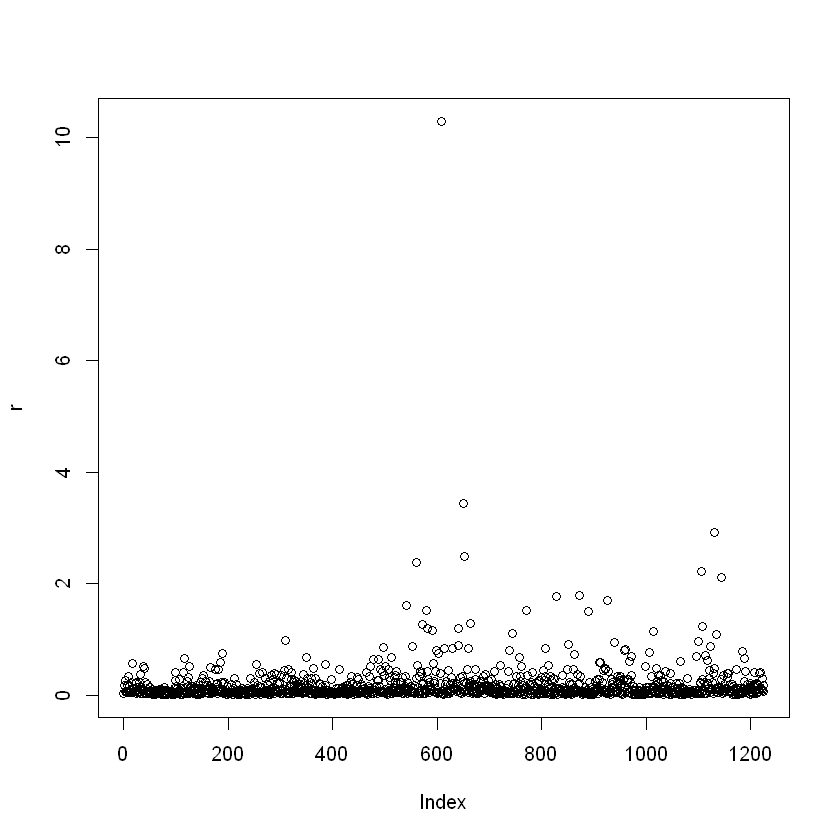

In [473]:
plot(r)

## Problem 8

In Section 10.2.3, a formula for calculating PVE was given in Equation 10.8. We also saw that the PVE can be obtained using the sdev
output of the prcomp() function.
On the USArrests data, calculate PVE in two ways:

(a) Using the sdev output of the prcomp() function, as was done in
Section 10.2.3.

In [474]:
pr.out=prcomp(USArrests, scale=TRUE)
summary (pr.out)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.5749 0.9949 0.59713 0.41645
Proportion of Variance 0.6201 0.2474 0.08914 0.04336
Cumulative Proportion  0.6201 0.8675 0.95664 1.00000

In [475]:
pve =pr.out$sdev^2/sum(pr.out$sdev^2)
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

(b) By applying Equation 10.8 directly. That is, use the prcomp()
function to compute the principal component loadings. Then,
use those loadings in Equation 10.8 to obtain the PVE.

In [476]:
pr.out$rotation

,PC1,PC2,PC3,PC4
Murder,-0.5358995,0.4181809,-0.3412327,0.64922780
Assault,-0.5831836,0.1879856,-0.2681484,-0.74340748
UrbanPop,-0.2781909,-0.8728062,-0.3780158,0.13387773
Rape,-0.5434321,-0.1673186,0.8177779,0.08902432


In [477]:
apply((as.matrix(scale(USArrests)) %*% pr.out$rotation)^2, 2, sum)/sum(apply(as.matrix(scale(USArrests))^2, 2, sum))

PC1        PC2        PC3        PC4 
0.62006039 0.24744129 0.08914080 0.04335752

## Problem 9

Consider the USArrests data. We will now perform hierarchical clustering on the states.

(a) Using hierarchical clustering with complete linkage and
Euclidean distance, cluster the states

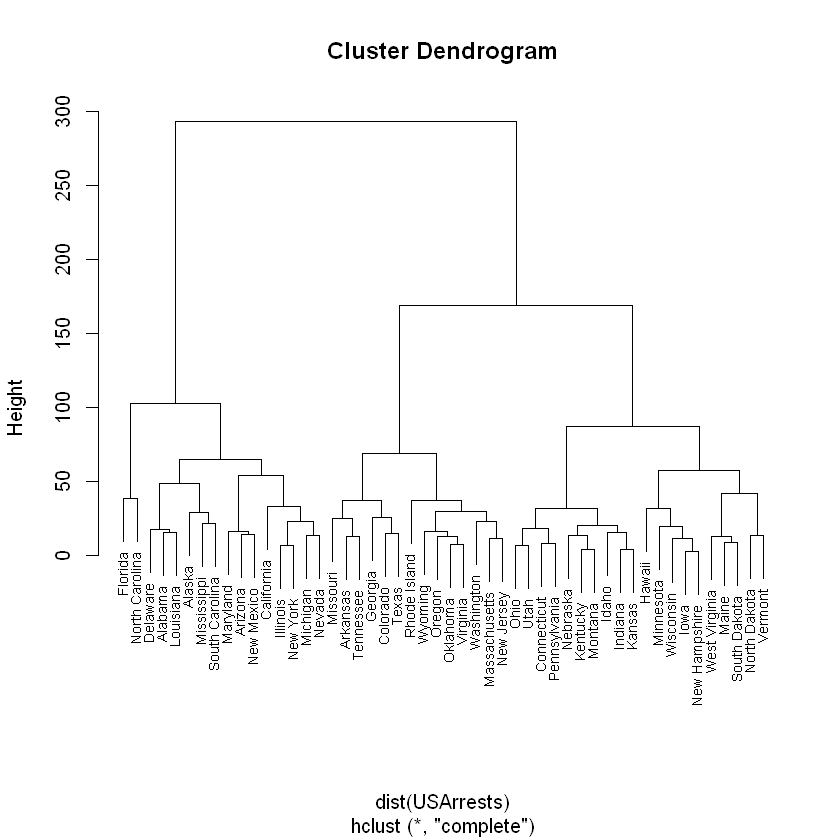

In [478]:
hc.complete =hclust(dist(USArrests), method="complete")
plot(hc.complete, cex = 0.7)

(b) Cut the dendrogram at a height that results in three distinct
clusters. Which states belong to which clusters?

In [479]:
cutree(hc.complete , 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2

(c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one

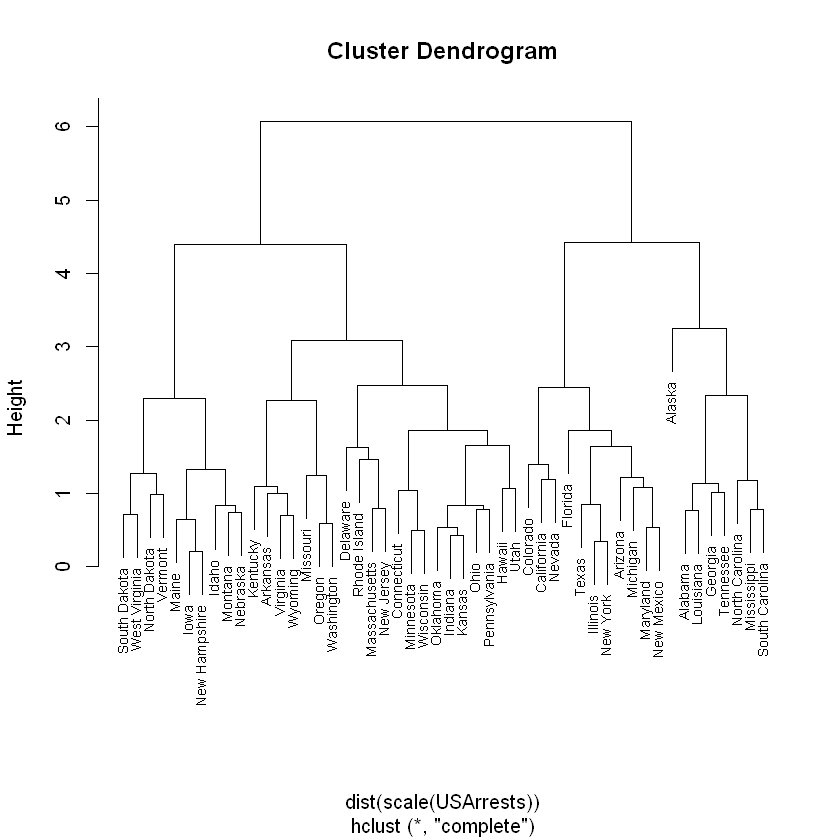

In [480]:
hc.complete =hclust(dist(scale(USArrests)), method="complete")
plot(hc.complete, cex = 0.7)

 (d) What effect does scaling the variables have on the hierarchical
clustering obtained? In your opinion, should the variables be
scaled before the inter-observation dissimilarities are computed?
Provide a justification for your answer.

In [481]:
cutree(hc.complete, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              2              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              1              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

It depends on what we are scaling, how the features that we are scaling change. In this case scaling is good.

## Problem 10

In this problem, you will generate simulated data, and then perform
PCA and K-means clustering on the data.

(a) Generate a simulated data set with 20 observations in each of
three classes (i.e. 60 observations total), and 50 variables.

In [482]:
set.seed(2)
x=matrix(rnorm (60*50), ncol=50)
x[1:20,]=x[1:20,]+1.9
x[21:40,]=x[21:40,]
x[41:60,]=x[41:60,]-1.2

(b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate
the observations in each of the three classes. If the three classes
appear separated in this plot, then continue on to part (c). If
not, then return to part (a) and modify the simulation so that
there is greater separation between the three classes. Do not
continue to part (c) until the three classes show at least some
separation in the first two principal component score vectors.

In [483]:
pr.out=prcomp(x, scale=TRUE)
pr.out

Standard deviations (1, .., p=50):
 [1] 5.63734074 1.07584211 1.06901673 1.03682885 0.99906795 0.98024217
 [7] 0.96793792 0.89678904 0.89085910 0.86482483 0.84827484 0.83730343
[13] 0.79311171 0.75552631 0.74730162 0.73219089 0.69735095 0.67529075
[19] 0.64216039 0.62348547 0.60931925 0.60015194 0.58089664 0.55931419
[25] 0.53149306 0.50747485 0.48550904 0.47605929 0.46681653 0.43098327
[31] 0.41012878 0.38638763 0.36584221 0.35609029 0.34162745 0.33210326
[37] 0.30814378 0.28664471 0.25881189 0.23382348 0.22969737 0.20709073
[43] 0.18728588 0.17611831 0.16341375 0.14949308 0.12228919 0.10961942
[49] 0.10513073 0.06689958

Rotation (n x k) = (50 x 50):
             PC1          PC2          PC3          PC4          PC5
 [1,] -0.1346281 -0.097427285  0.257668538 -0.007639441  0.383518681
 [2,] -0.1263251 -0.274133161 -0.119270389 -0.328451430  0.068409535
 [3,] -0.1477704  0.084255720  0.104786044  0.110601982 -0.081877966
 [4,] -0.1339423  0.072942138  0.208238639 -0.297435592  0.0528

In [484]:
#First 2 PCA vectors
v1=pr.out$x[,1]
v2=pr.out$x[,1]

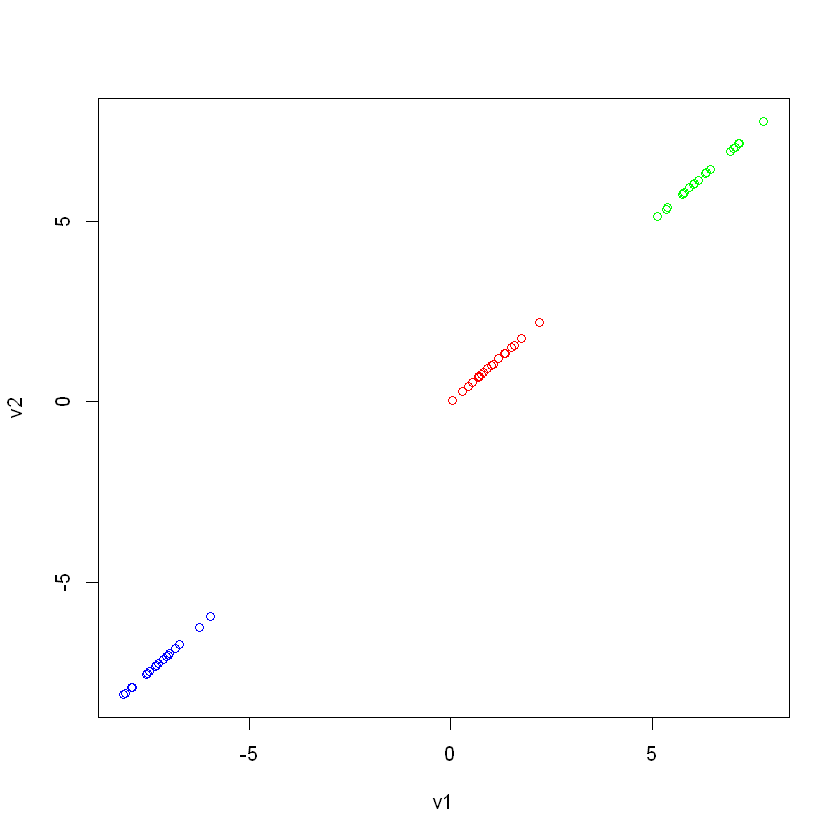

In [485]:
plot(v1, v2, col="white")
points(v1[1:20], v2[1:20], col="blue")
points(v1[21:40], v2[21:40], col="red")
points(v1[41:60], v2[41:60], col="green")


(c) Perform K-means clustering of the observations with K = 3.
How well do the clusters that you obtained in K-means clustering compare to the true class labels?

           
true.labels  1  2  3
          1 20  0  0
          2  0 20  0
          3  0  0 20
K-means clustering with 3 clusters of sizes 20, 20, 20

Cluster means:
           [,1]       [,2]        [,3]       [,4]        [,5]       [,6]
1 -1.1047459003 -0.8546092 -1.39311468 -1.1456293 -0.92672084 -0.7185880
2  2.0954610335  1.7277066  2.07098020  1.6536095  2.16710311  1.9131972
3 -0.0002817572 -0.2716307  0.06920741  0.2011944 -0.08128483  0.5786149
        [,7]       [,8]       [,9]      [,10]      [,11]      [,12]       [,13]
1 -1.5856053 -1.2460829 -0.8050521 -1.4090912 -1.5178003 -0.7829929 -1.29168931
2  2.1283581  2.0173018  1.6175142  2.2391202  1.8858313  1.8463649  2.09885049
3  0.2689213 -0.1385681  0.2169117  0.5204259  0.0773991 -0.1598969  0.06276594
       [,14]       [,15]       [,16]      [,17]      [,18]      [,19]
1 -0.9892732 -1.05746168 -1.29614086 -1.0910281 -0.8747497 -1.0155970
2  2.1564782  1.85872691  2.39813969  1.6655305  2.3079194  1.8347391
3 -0.311094

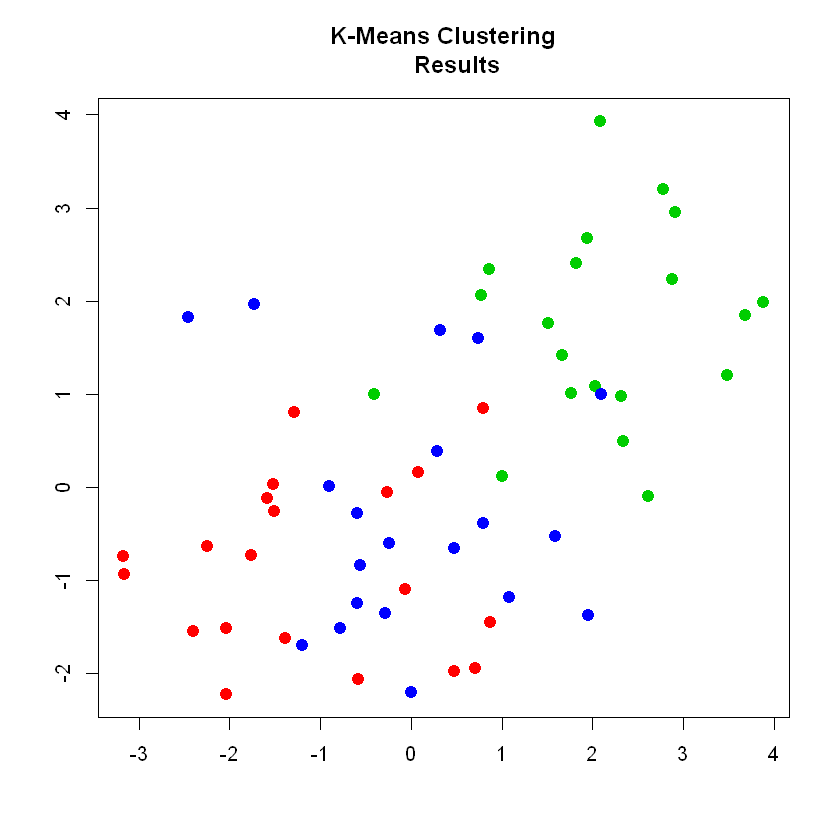

In [486]:
kmean_results(x, 3)

In this case labels are assigned perfectly

(d) Perform K-means clustering with K = 2. Describe your results.

           
true.labels  1  2
          1 20  0
          2  0 20
          3 20  0
K-means clustering with 2 clusters of sizes 40, 20

Cluster means:
        [,1]       [,2]       [,3]       [,4]       [,5]        [,6]      [,7]
1 -0.5525138 -0.5631199 -0.6619536 -0.4722175 -0.5040028 -0.06998655 -0.658342
2  2.0954610  1.7277066  2.0709802  1.6536095  2.1671031  1.91319716  2.128358
        [,8]       [,9]      [,10]      [,11]      [,12]      [,13]      [,14]
1 -0.6923255 -0.2940702 -0.4443327 -0.7202006 -0.4714449 -0.6144617 -0.6501838
2  2.0173018  1.6175142  2.2391202  1.8858313  1.8463649  2.0988505  2.1564782
       [,15]      [,16]      [,17]      [,18]      [,19]      [,20]      [,21]
1 -0.5209347 -0.6886498 -0.6369425 -0.6966742 -0.5714657 -0.4874063 -0.7599738
2  1.8587269  2.3981397  1.6655305  2.3079194  1.8347391  1.8160787  1.7099077
       [,22]      [,23]      [,24]      [,25]      [,26]      [,27]      [,28]
1 -0.4183069 -0.7785458 -0.4243739 -0.5699656 -0.5318666 -0

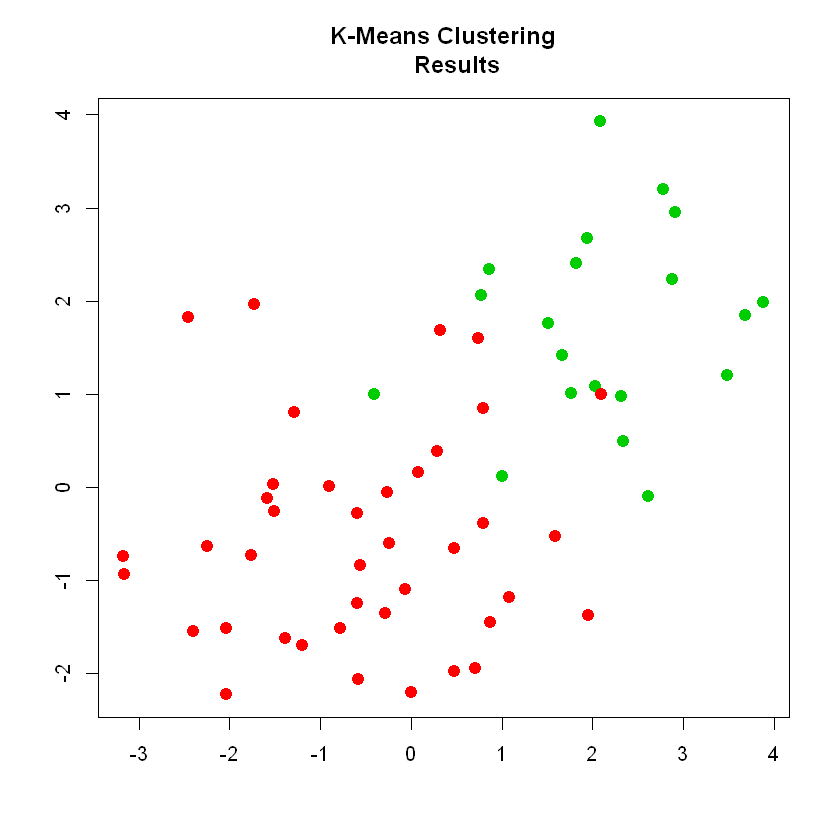

In [487]:
kmean_results(x, 2)

In this case two closest classes are assigned to one label.

(e) Now perform K-means clustering with K = 4, and describe your
results.

           
true.labels  1  2  3  4
          1  0 12  0  8
          2  0  0 20  0
          3 20  0  0  0
K-means clustering with 4 clusters of sizes 20, 12, 20, 8

Cluster means:
           [,1]       [,2]        [,3]       [,4]        [,5]       [,6]
1 -0.0002817572 -0.2716307  0.06920741  0.2011944 -0.08128483  0.5786149
2 -0.6409488183 -0.8616622 -1.56260025 -0.9416101 -1.16716928 -0.7684152
3  2.0954610335  1.7277066  2.07098020  1.6536095  2.16710311  1.9131972
4 -1.8004415233 -0.8440297 -1.13888633 -1.4516580 -0.56604818 -0.6438471
        [,7]       [,8]       [,9]      [,10]      [,11]      [,12]       [,13]
1  0.2689213 -0.1385681  0.2169117  0.5204259  0.0773991 -0.1598969  0.06276594
2 -1.8318686 -1.5211251 -0.6765295 -1.2400022 -1.8023670 -0.6623215 -1.43265666
3  2.1283581  2.0173018  1.6175142  2.2391202  1.8858313  1.8463649  2.09885049
4 -1.2162104 -0.8335197 -0.9978359 -1.6627247 -1.0909502 -0.9640000 -1.08023830
       [,14]       [,15]       [,16]      [,17]      

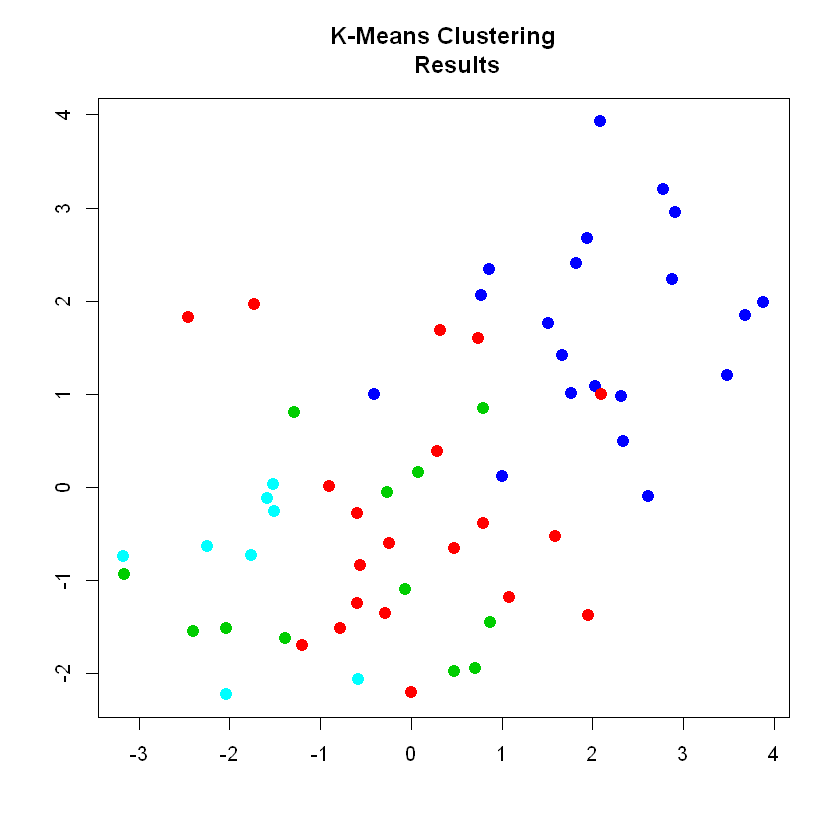

In [488]:
kmean_results(x, 4)

In this case one of classes got splitted.

(f) Now perform K-means clustering with K = 3 on the first two
principal component score vectors, rather than on the raw data.
That is, perform K-means clustering on the 60 × 2 matrix of
which the first column is the first principal component score
vector, and the second column is the second principal component
score vector. Comment on the results.

           
true.labels  1  2  3
          1 20  0  0
          2  0 20  0
          3  0  0 20
K-means clustering with 3 clusters of sizes 20, 20, 20

Cluster means:
          v1         v2
1  6.2588225  6.2588225
2 -7.2496914 -7.2496914
3  0.9908688  0.9908688

Clustering vector:
 [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

Within cluster sum of squares by cluster:
[1] 19.26465 11.91029 10.31090
 (between_SS / total_SS =  98.9 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


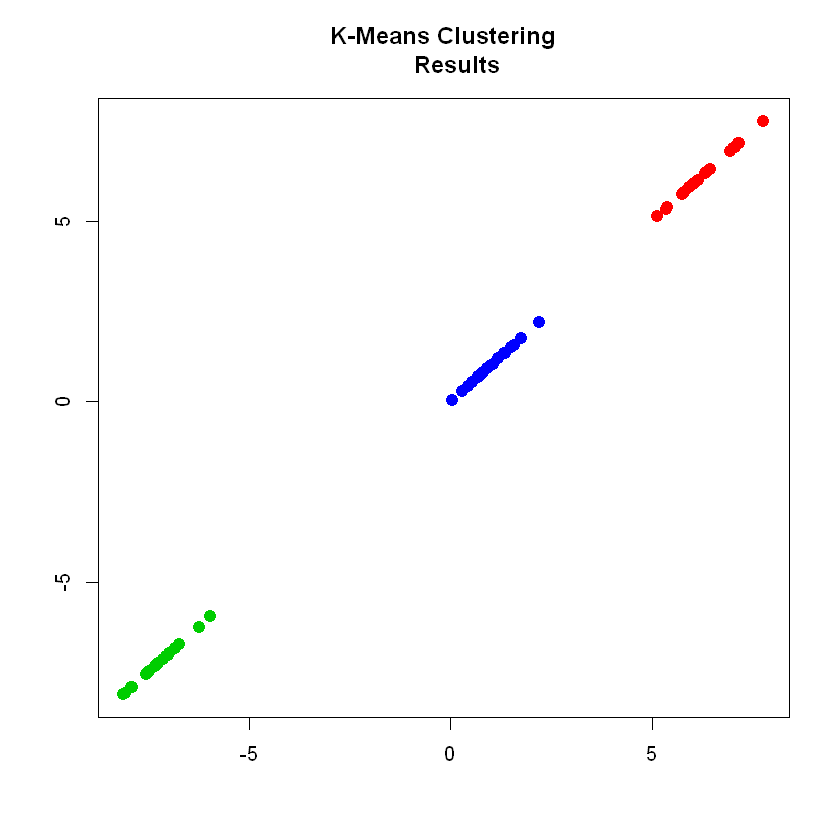

In [489]:
xn=cbind(v1, v2)
kmean_results(xn, 3)

           
true.labels  1  2  3
          1 20  0  0
          2  0 20  0
          3  0  0 20
K-means clustering with 3 clusters of sizes 20, 20, 20

Cluster means:
        [,1]       [,2]       [,3]        [,4]       [,5]         [,6]
1 -0.8114978 -0.6806906 -0.9336046 -0.90209871 -0.7886399 -0.969741159
2  0.9983693  0.9852759  1.0358359  0.92507326  1.0695108  0.978967036
3 -0.1868715 -0.3045853 -0.1022312 -0.02297455 -0.2808710 -0.009225877
           [,7]       [,8]        [,9]       [,10]       [,11]      [,12]
1 -1.0048001050 -0.8692440 -0.83386172 -1.04074710 -0.98189621 -0.7338333
2  1.0056861085  1.0777312  0.92552365  1.00140973  1.02378050  1.0459094
3 -0.0008860036 -0.2084872 -0.09166193  0.03933737 -0.04188429 -0.3120761
       [,13]      [,14]      [,15]      [,16]      [,17]      [,18]      [,19]
1 -0.9126314 -0.7505272 -0.8578244 -0.9039484 -0.8179164 -0.7068160 -0.8084345
2  1.0437330  1.1017337  1.0234182  1.1367484  1.0277594  1.2002276  1.0406354
3 -0.1311016 -0.

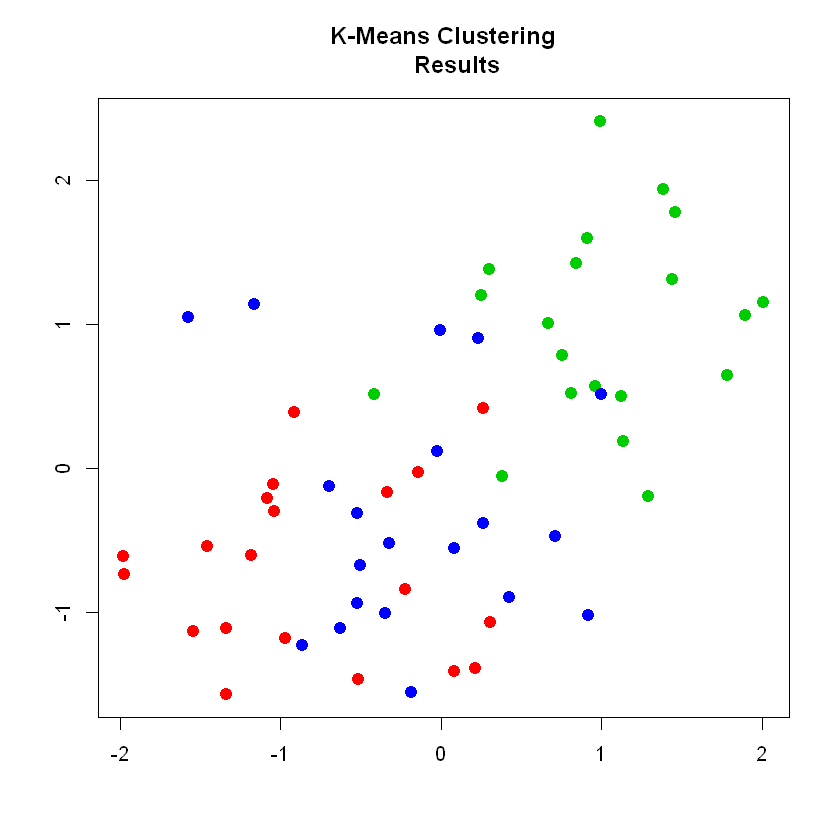

In [490]:
kmean_results(scale(x), 3)

There is no effect from scale.

## Problem 11

Load in the data using read.csv(). You will need to select
header=F.

In [491]:
df<-read.csv("Ch10Ex11.csv", header=FALSE)
head(df)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40
-0.96193340,0.4418028,-0.9750051,1.4175040,0.8188148,0.3162937,-0.02496682,-0.06396600,0.03149702,-0.3503106,...,-0.5095915,-0.216725500,-0.05550597,-0.4844491,-0.5215811,1.9491350,1.32433500,0.4681471,1.06110000,1.6559700
-0.29252570,-1.1392670,0.1958370,-1.2811210,-0.2514393,2.5119970,-0.92220620,0.05954277,-1.40964500,-0.6567122,...,1.7007080,0.007289556,0.09906234,0.5638533,-0.2572752,-0.5817805,-0.16988710,-0.5423036,0.31293890,-1.2843770
0.25878820,-0.9728448,0.5884858,-0.8002581,-1.8203980,-2.0589240,-0.06476437,1.59212400,-0.17311700,-0.1210874,...,-0.6154720,0.009999363,0.94581000,-0.3185212,-0.1178895,0.6213662,-0.07076396,0.4016818,-0.01622713,-0.5265532
-1.15213200,-2.2131680,-0.8615249,0.6309253,0.9517719,-1.1657240,-0.39155860,1.06361900,-0.35000900,-1.4890580,...,-0.2842774,0.198945600,-0.09183320,0.3496279,-0.2989097,1.5136960,0.67118470,0.0108553,-1.04368900,1.6252750
0.19578280,0.5933059,0.2829921,0.2471472,1.9786680,-0.8710180,-0.98971500,-1.03225300,-1.10965400,-0.3851423,...,-0.6929984,-0.845707200,-0.17749680,-0.1664908,1.4831550,-1.6879460,-0.14142960,0.2007785,-0.67594210,2.2206110
0.03012394,-0.6910143,-0.4034258,-0.7298590,-0.3640986,1.1253490,-1.40404100,-0.80613040,-1.23792400,0.5776018,...,1.1567370,0.241774500,0.08863952,0.1829540,0.9426771,-0.2096004,0.53626210,-1.1852260,-0.42274760,0.6243603


(b) Apply hierarchical clustering to the samples using correlationbased distance, and plot the dendrogram. Do the genes separate
the samples into the two groups? Do your results depend on the
type of linkage used?

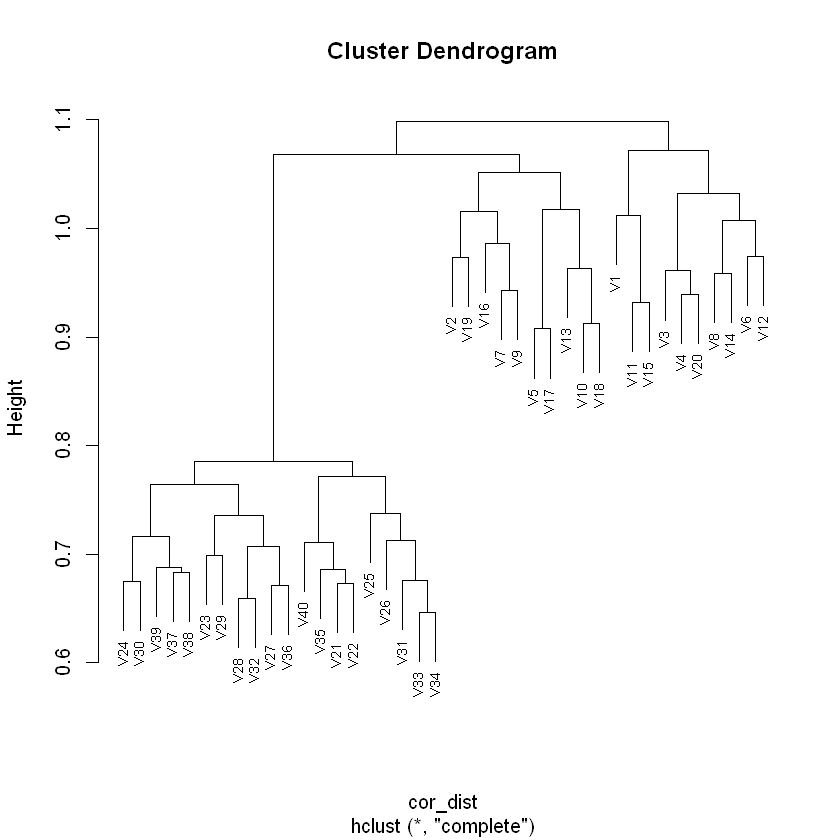

In [492]:
cor_dist = as.dist(1-cor(df))
hc.complete =hclust(cor_dist, method="complete")
plot(hc.complete, cex = 0.7)

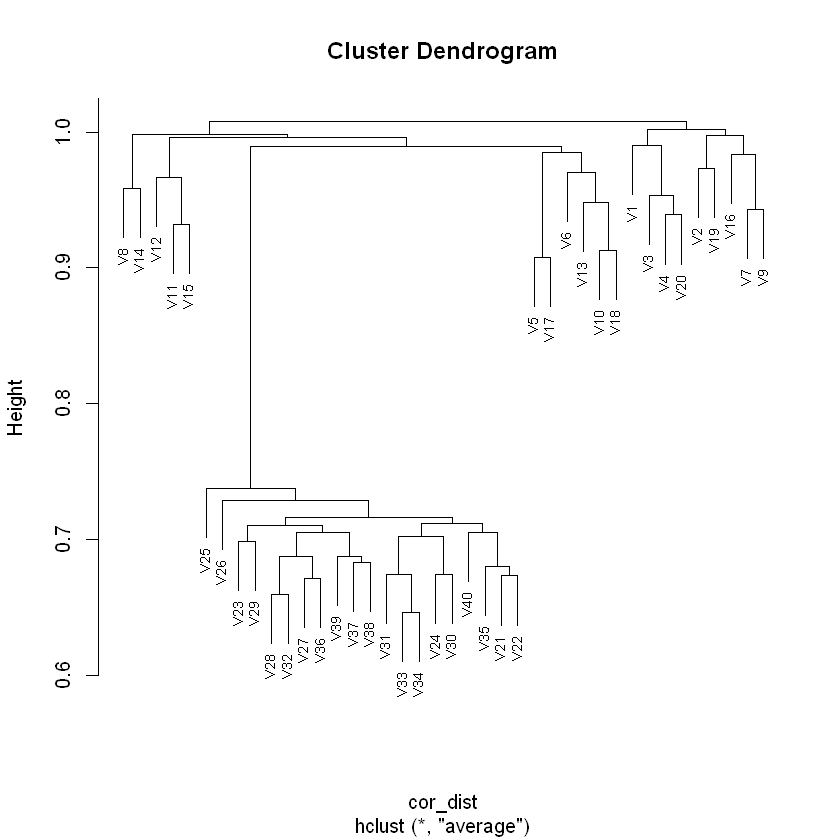

In [493]:
hc.average =hclust(cor_dist, method="average")
plot(hc.average, cex = 0.7)

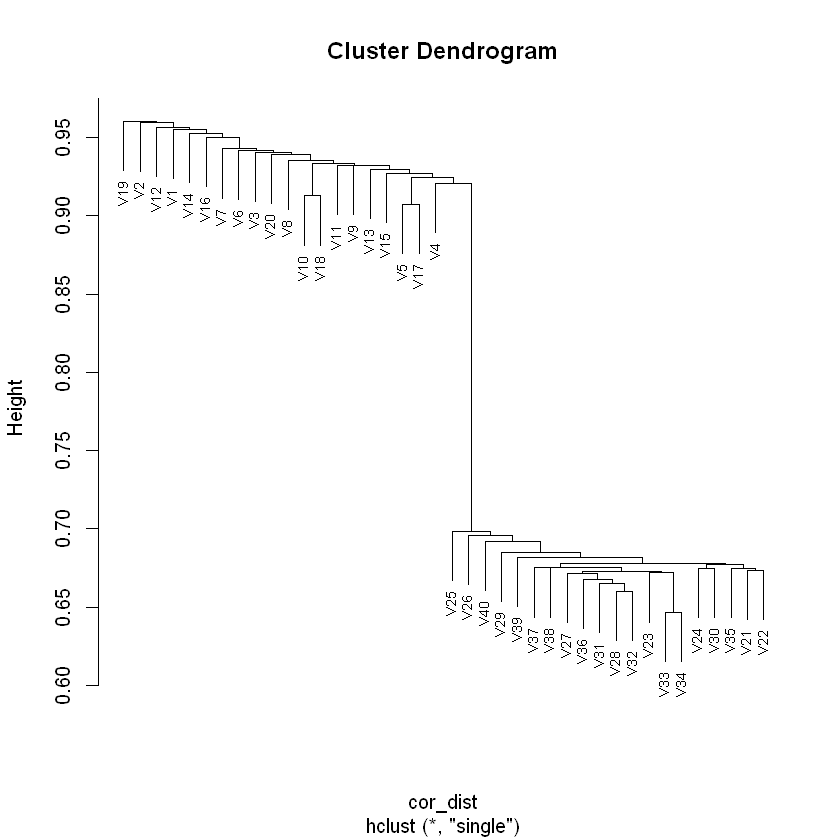

In [494]:
hc.single =hclust(cor_dist, method="single")
plot(hc.single, cex = 0.7)

The dendrograms look differentely for different linkage.